In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = "/content/train" #passing the path with training images
test_dir = "/content/test"   #passing the path with testing images



In [ ]:
img_size = 48 #original size of the image

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)



In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )


In [ ]:


epochs = 60
batch_size = 64



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 25s 70ms/step - loss: 1.0922 - accuracy: 0.6850 - val_loss: 1.2623 - val_accuracy: 0.6201
Epoch 2/60
359/359 [==============================] - 25s 70ms/step - loss: 1.0867 - accuracy: 0.6853 - val_loss: 1.2810 - val_accuracy: 0.6257
Epoch 3/60
359/359 [==============================] - 26s 72ms/step - loss: 1.0926 - accuracy: 0.6890 - val_loss: 1.3033 - val_accuracy: 0.6264
Epoch 4/60
359/359 [==============================] - 26s 71ms/step - loss: 1.0722 - accuracy: 0.6906 - val_loss: 1.2862 - val_accuracy: 0.6306
Epoch 5/60
359/359 [==============================] - 26s 72ms/step - loss: 1.0788 - accuracy: 0.6888 - val_loss: 1.2590 - val_accuracy: 0.6257
Epoch 6/60
359/359 [==============================] - 26s 71ms/step - loss: 1.0778 - accuracy: 0.6906 - val_loss: 1.3040 - val_accuracy: 0.6320
Epoch 7/60
359/359 [==============================] - 25s 68ms/step - loss: 1.0824 - accuracy: 0.6841 - val_loss: 1.2617 - val_accuracy:

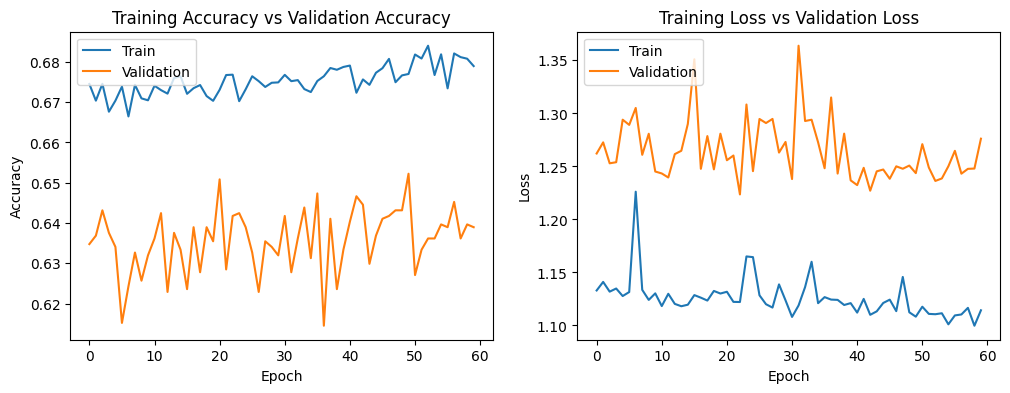

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
import pip

pip.main(['install', 'seaborn'])

from flask import Flask

import time
import tensorflow as tf
import cv2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Requirement already satisfied: seaborn in /usr/local/lib/python3.9/dist-packages (0.12.2)

Requirement already satisfied: pandas>=0.25 in /usr/local/lib/python3.9/dist-packages (from seaborn) (1.5.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /usr/local/lib/python3.9/dist-packages (from seaborn) (3.7.1)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /usr/local/lib/python3.9/dist-packages (from seaborn) (1.22.4)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (8.4.0)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.1)

Requirement already satisfied: importlib-resources>=3.2.0 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (5.12.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.39.3)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.0.7)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.0.9)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.9/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.9/dist-packages (from pandas>=0.25->seaborn) (2022.7.1)

Requirement already satisfied: zipp>=3.1.0 in /usr/local/lib/python3.9/dist-packages (from importlib-resources>=3.2.0->matplotlib!=3.6.1,>=3.1->seaborn) (3.15.0)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.9/dist-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

NumExpr defaulting to 2 threads.

In [ ]:
!pip install fer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.4 MB/s eta 0:00:00


In [ ]:
from fer import FER
from fer import Video

In [ ]:
def upload_emotion_video(path):
    location_videofile = path

    face_detector = FER(mtcnn=True)

    input_video = Video(location_videofile)

    processing_data = input_video.analyze(face_detector, display=False, save_video=False, save_frames=False,
                                          zip_images=False, frequency=50)

    vid_df = input_video.to_pandas(processing_data)
    vid_df = input_video.get_first_face(vid_df)
    vid_df = input_video.get_emotions(vid_df)

    # print("vid_df.angry")
    print(vid_df.angry)
    print(sum(vid_df.angry))

    angry = sum(vid_df.angry) / len(vid_df.angry)
    disgust = sum(vid_df.disgust) / len(vid_df.disgust)
    fear = sum(vid_df.fear) / len(vid_df.fear)
    happy = sum(vid_df.happy) / len(vid_df.happy)
    sad = sum(vid_df.sad) / len(vid_df.sad)
    surprise = sum(vid_df.surprise) / len(vid_df.surprise)
    neutral = sum(vid_df.neutral) / len(vid_df.neutral)

    percentages = []
    dict_emotion_values={}
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]
    for i in emotions:
      index_pos= emotions.index(i)
      dict_emotion_values[i]=emotions_values[index_pos]
    # print("emotion:"+str(emotions_values))
    # for i in emotion_values:
    # print(dict_emotion_values)
    max_arg=max(emotions_values)
    index = emotions_values.index(max_arg)
    dict_response={}
    dict_response[emotions[index]]=max_arg
    # print(dict_response)
      

    return dict_emotion_values,dict_response


In [ ]:
!pip install -U flask-cors
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask,request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
from flask_cors import CORS, cross_origin
import cv2 as cv
app = Flask(__name__)
CORS(app)
run_with_ngrok(app)

@app.route('/')
def index():
    return jsonify({"Hello":"response1"})

@app.route('/emotions', methods=['GET', 'POST'])
def get_emotions_suggestions():
    if request.method == 'POST':
        f = request.files['file']
        f.save(f.filename)
        emotion_val,dominant_emotion = upload_emotion_video(f.filename)
        result = {"Emotions": emotion_val,"Dominant Emotion":dominant_emotion}
        print(result)
        return (result)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000

Press CTRL+C to quit

 * Running on http://6135-34-74-8-174.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


30.00 fps, 118 frames, 3.93 seconds

  3%|▎         | 3/118 [00:08<05:32,  2.89s/frames]

0    0.0
1    0.0
2    0.0
Name: angry, dtype: float64
0.0
{'Emotions': {'Angry': 0.0, 'Disgust': 0.0, 'Fear': 0.01, 'Happy': 0.8933333333333334, 'Sad': 0.08666666666666667, 'Surprise': 0.006666666666666667, 'Neutral': 0.0033333333333333335}, 'Dominant Emotion': {'Happy': 0.8933333333333334}}


127.0.0.1 - - [24/Apr/2023 04:47:52] "POST /emotions HTTP/1.1" 200 -